<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.325621,-0.000576,51.325044,51.325645,-0.000600
1,0.0,1.0,39.724730,-0.000240,49.724490,49.724755,-0.000265
2,0.0,2.0,39.435464,0.000456,49.435920,49.435490,0.000430
3,0.0,3.0,21.822790,-0.002509,31.820282,31.822832,-0.002550
4,0.0,4.0,80.374896,-0.000072,90.374825,90.374886,-0.000061
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.348029,-0.000458,44.347571,44.347946,-0.000374
59996,999.0,56.0,56.800469,-0.000008,66.800462,66.800433,0.000029
59997,999.0,57.0,91.791590,-0.000141,101.791449,101.791627,-0.000177
59998,999.0,58.0,84.086748,-0.000060,94.086688,94.086768,-0.000080


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.325621,-0.000576,51.325044,51.325645,-0.000600
1,0.0,1.0,39.724730,-0.000240,49.724490,49.724755,-0.000265
2,0.0,2.0,39.435464,0.000456,49.435920,49.435490,0.000430
3,0.0,3.0,21.822790,-0.002509,31.820282,31.822832,-0.002550
4,0.0,4.0,80.374896,-0.000072,90.374825,90.374886,-0.000061
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.348029,-0.000458,44.347571,44.347946,-0.000374
59996,999.0,56.0,56.800469,-0.000008,66.800462,66.800433,0.000029
59997,999.0,57.0,91.791590,-0.000141,101.791449,101.791627,-0.000177
59998,999.0,58.0,84.086748,-0.000060,94.086688,94.086768,-0.000080


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    41.325621 -0.000576   51.325044   51.325645 -0.000600
      1.0    39.724730 -0.000240   49.724490   49.724755 -0.000265
      2.0    39.435464  0.000456   49.435920   49.435490  0.000430
      3.0    21.822790 -0.002509   31.820282   31.822832 -0.002550
      4.0    80.374896 -0.000072   90.374825   90.374886 -0.000061
...                ...       ...         ...         ...       ...
999.0 55.0   34.348029 -0.000458   44.347571   44.347946 -0.000374
      56.0   56.800469 -0.000008   66.800462   66.800433  0.000029
      57.0   91.791590 -0.000141  101.791449  101.791627 -0.000177
      58.0   84.086748 -0.000060   94.086688   94.086768 -0.000080
      59.0   94.049257 -0.000127  104.049130  104.049299 -0.000168

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    41.325621 -0.000576   51.325044   51.325645 -0.000600
      1.0    39.724730 -0.000240   49.724490   49.724755 -0.000265
      2.0    39.435464  0.000456   49.435920   49.435490  0.000430
      3.0    21.822790 -0.002509   31.820282   31.822832 -0.002550
      4.0    80.374896 -0.000072   90.374825   90.374886 -0.000061
...                ...       ...         ...         ...       ...
999.0 55.0   34.348029 -0.000458   44.347571   44.347946 -0.000374
      56.0   56.800469 -0.000008   66.800462   66.800433  0.000029
      57.0   91.791590 -0.000141  101.791449  101.791627 -0.000177
      58.0   84.086748 -0.000060   94.086688   94.086768 -0.000080
      59.0   94.049257 -0.000127  104.049130  104.049299 -0.000168

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.325621,-0.000576,51.325044,51.325645,-0.000600
1,0.0,1.0,39.724730,-0.000240,49.724490,49.724755,-0.000265
2,0.0,2.0,39.435464,0.000456,49.435920,49.435490,0.000430
3,0.0,3.0,21.822790,-0.002509,31.820282,31.822832,-0.002550
4,0.0,4.0,80.374896,-0.000072,90.374825,90.374886,-0.000061
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.348029,-0.000458,44.347571,44.347946,-0.000374
59996,999.0,56.0,56.800469,-0.000008,66.800462,66.800433,0.000029
59997,999.0,57.0,91.791590,-0.000141,101.791449,101.791627,-0.000177
59998,999.0,58.0,84.086748,-0.000060,94.086688,94.086768,-0.000080


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    41.325621 -0.000576   51.325044   51.325645 -0.000600
      1.0    39.724730 -0.000240   49.724490   49.724755 -0.000265
      2.0    39.435464  0.000456   49.435920   49.435490  0.000430
      3.0    21.822790 -0.002509   31.820282   31.822832 -0.002550
      4.0    80.374896 -0.000072   90.374825   90.374886 -0.000061
...                ...       ...         ...         ...       ...
999.0 55.0   34.348029 -0.000458   44.347571   44.347946 -0.000374
      56.0   56.800469 -0.000008   66.800462   66.800433  0.000029
      57.0   91.791590 -0.000141  101.791449  101.791627 -0.000177
      58.0   84.086748 -0.000060   94.086688   94.086768 -0.000080
      59.0   94.049257 -0.000127  104.049130  104.049299 -0.000168

[60000 rows x 5 columns]

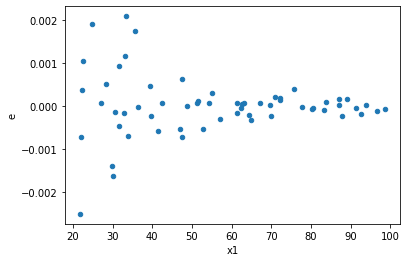

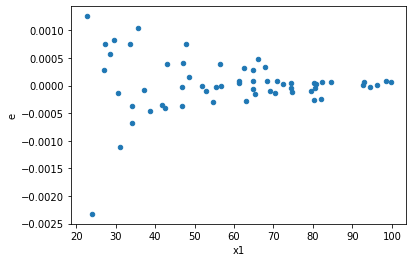

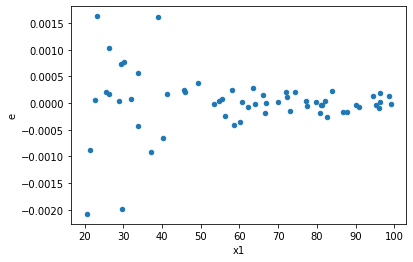

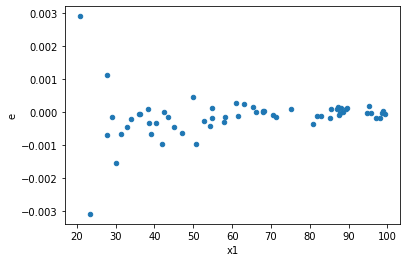

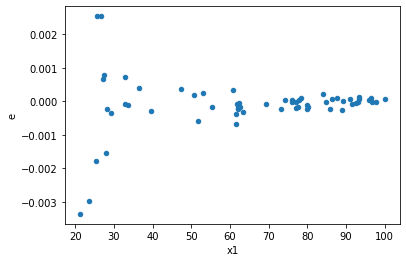

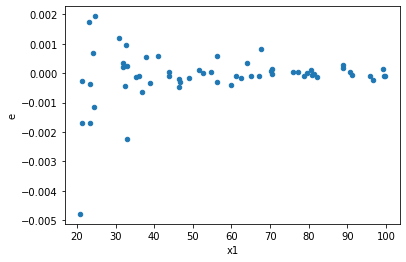

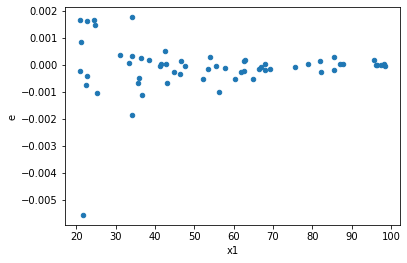

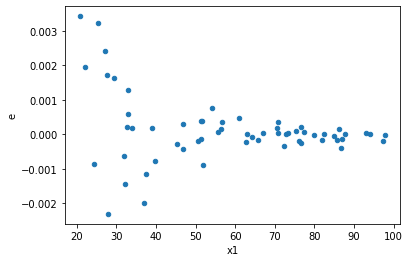

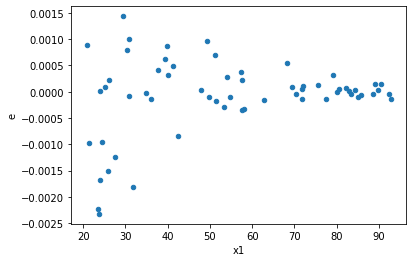

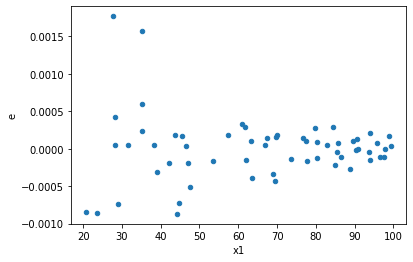

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,2.8164978109706056e-05,6.723941674195275e-07,1.2245642656393938e-06,2.9234529018240327e-08,0.023873413456970194,1.859578528225637e-13,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,1.3676732513389964e-05,5.46875564584966e-07,5.946405440604333e-07,2.3777198460215915e-08,0.03998583463188719,5.036379318440628e-11,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,1.835778892434548e-05,4.341242102406787e-07,7.981647358411078e-07,1.8874965662638203e-08,0.023647957389081743,1.6751168079525756e-13,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,2.39385917261312e-05,3.79261826730184e-07,1.040808335918748e-06,1.6489644640442782e-08,0.015843113541060327,1.9671284974582156e-15,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,4.088314735524352e-05,3.3757575695451237e-07,1.777528145880153e-06,1.4677206824109234e-08,0.008257088281908319,1.2823532477932351e-18,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,4.2403297386353946e-05,8.936608608530164e-07,1.8436216254936497e-06,3.885482003708767e-08,0.021075268102631346,4.697876528381862e-14,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,5.277708249814831e-05,6.737249744475561e-07,2.2946557607890568e-06,2.9292390193372004e-08,0.012765483474218074,1.749660355324584e-16,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,4.301067355484545e-05,6.513919327062778e-07,1.8700292849932806e-06,2.8321388378533817e-08,0.015144890299745,1.1886103443308532e-15,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,2.3053336458076682e-05,5.527080586228024e-07,1.0023189764381165e-06,2.4030785157513148e-08,0.023975187263150472,1.948716221984888e-13,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64